In [109]:
Smoking_Performance = read.table("D:\\Amar\\Codes_Data\\Ex16-21.dat", header = TRUE )

In [55]:
Smoking_Performance

SMKGRP,RECALL
<int>,<int>
1,27
1,34
1,19
1,20
1,56
1,35
1,23
1,37
1,4


In [13]:
library(rstatix)

# تغییر نام گروه های مطالعاتی 

In [103]:
Smoking_Performance = Smoking_Performance %>% mutate (SMKGRP = ifelse (SMKGRP == "1", "Non_Smokers", ifelse(SMKGRP == "2", "Delayed_Smokers", "Active_Smokers") ))

# خلاصه ای از آماره های گروه های مورد مطالعه

In [110]:
Smoking_Performance %>% group_by(SMKGRP) %>% get_summary_stats(RECALL)

SMKGRP,variable,n,min,max,median,q1,q3,iqr,mad,mean,sd,se,ci
<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,RECALL,15,4,56,30,19.5,36,16.5,14.826,28.867,14.687,3.792,8.133
2,RECALL,15,6,71,48,26.5,54,27.5,22.239,39.933,20.133,5.198,11.149
3,RECALL,15,21,75,47,36.0,58,22.0,19.274,47.533,14.652,3.783,8.114


# نمودار جعبه ای جهت بررسی نمرات گروه ها و نمایش تصویری

In [21]:
library(ggpubr)

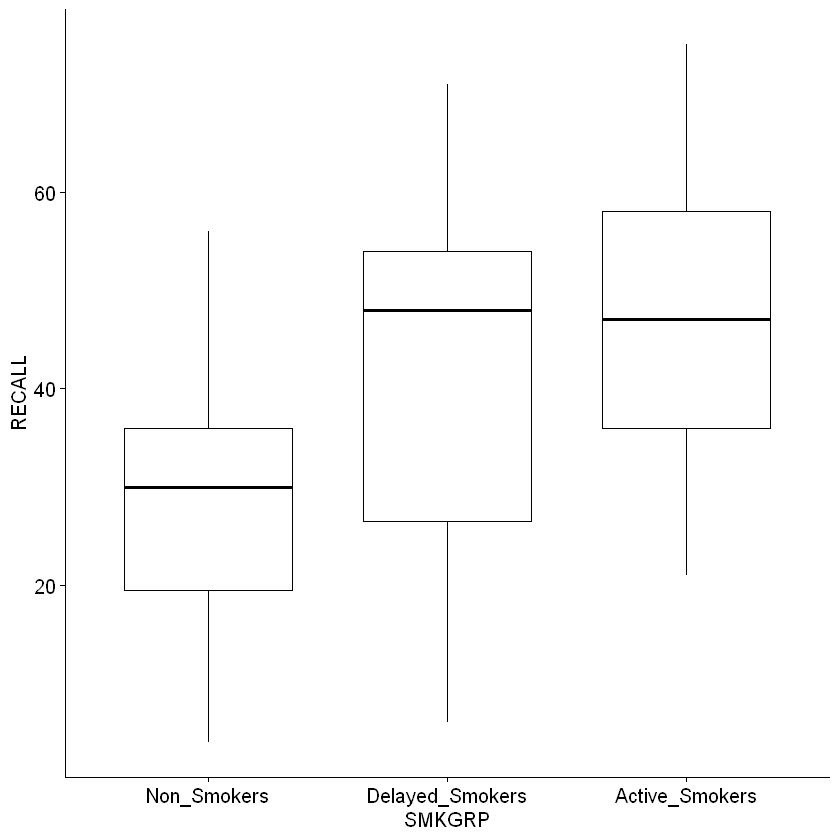

In [22]:
ggboxplot(Smoking_Performance, x = "SMKGRP", y = "RECALL")

# بخش پیش پردازش
# Preprocessing

## فرض صفر 

## H0: muN = muD = muA

## 1. بررسی وجود یا عدم وجود داده پرت

In [24]:
Smoking_Performance %>% group_by(SMKGRP) %>% identify_outliers(RECALL)

SMKGRP,RECALL,is.outlier,is.extreme
<chr>,<int>,<lgl>,<lgl>


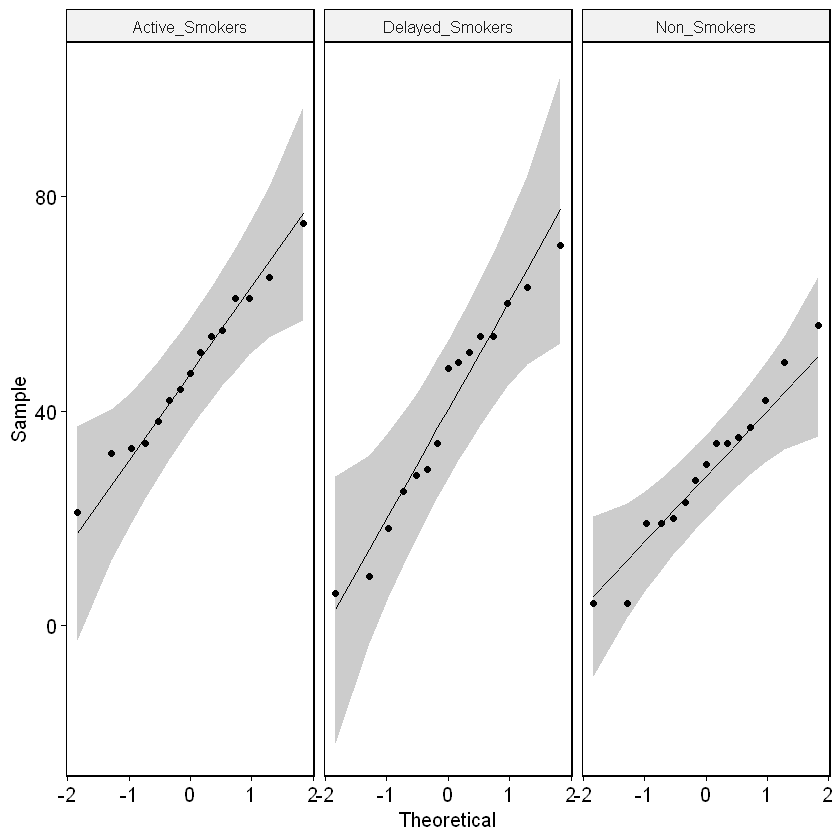

In [25]:
ggqqplot(Smoking_Performance, "RECALL", facet.by = "SMKGRP")

## 2. آزمون شاپیرو جهت بررسی نرمال بودن توزیع

In [28]:
Smoking_Performance %>% group_by(SMKGRP) %>% shapiro_test(RECALL)

SMKGRP,variable,statistic,p
<chr>,<chr>,<dbl>,<dbl>
Active_Smokers,RECALL,0.9859388,0.9949199
Delayed_Smokers,RECALL,0.9483760,0.4992471
Non_Smokers,RECALL,0.9686641,0.8378008


## 3. مقایسه واریانس ها 
#### که از شروط صادق بودن پیشفرض های آزمون آنوا همگن بودن واریان ها است

In [30]:
Smoking_Performance$SMKGRP = factor (Smoking_Performance$SMKGRP)

In [29]:
Smoking_Performance %>% levene_test(RECALL ~ SMKGRP)

Warning message in leveneTest.default(y = y, group = group, ...):
"group coerced to factor."


df1,df2,statistic,p
<int>,<int>,<dbl>,<dbl>
2,42,1.323643,0.2770375


# آزمون گرفتن

### پس از انجام مراحل پیش پردازش با تایید شدن صحبت پیش فرض ها و نبود داده پرت میتوان آزمون آماری مورد نظر را گرفت

In [31]:
Smoking_Performance %>% anova_test(RECALL ~ SMKGRP)

,Effect,DFn,DFd,F,p,p<.05,ges
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,SMKGRP,2,42,4.744,0.014,*,0.184


### فرض صفر رد می‌شود، چون مقدار تابع اف را داریم و مقدار پی برای آن تابع اف کم بوده و با یک ستاره معنادار میشود. 

### ***حالا اگر بخواهیم بدانیم کدام دو گروه برابر نیستند که فرض صفر رد شد باید آزمان های تعقیبی گرفت***

# Post_hoc test

### بسته به مقدار بحرانی آزمون آنوا اینجا باید این مقدار تقسیم بر تعداد مقایسه های دو به دو باشد

In [32]:
Smoking_Performance %>% tukey_hsd(RECALL ~ SMKGRP)

,term,group1,group2,null.value,estimate,conf.low,conf.high,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,SMKGRP,Active_Smokers,Delayed_Smokers,0,-7.60000,-22.40679,7.206788,0.4330,ns
2,SMKGRP,Active_Smokers,Non_Smokers,0,-18.66667,-33.47345,-3.859878,0.0104,*
3,SMKGRP,Delayed_Smokers,Non_Smokers,0,-11.06667,-25.87345,3.740122,0.1770,ns


In [33]:
p = Smoking_Performance %>% tukey_hsd(RECALL ~ SMKGRP)

In [34]:
p = p %>% add_xy_position(x = "SMKGRP")

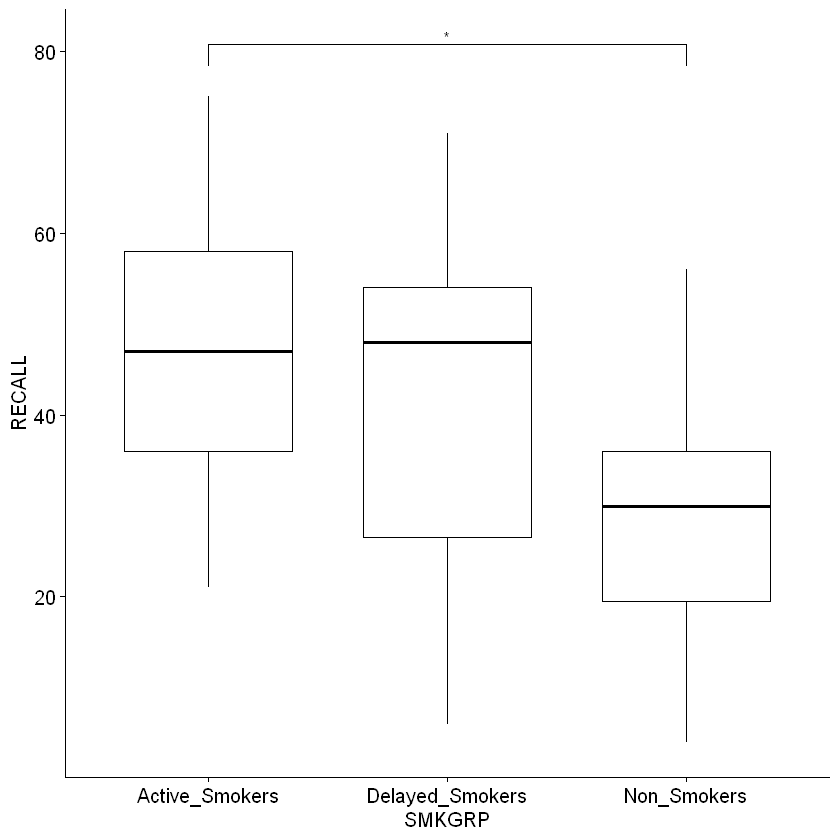

In [36]:
ggboxplot(Smoking_Performance, x = "SMKGRP", y = "RECALL") + stat_pvalue_manual(p, hide.ns = TRUE)

In [105]:
Smoking_Performance

SMKGRP,RECALL
<chr>,<int>
Non_Smokers,27
Non_Smokers,34
Non_Smokers,19
Non_Smokers,20
Non_Smokers,56
Non_Smokers,35
Non_Smokers,23
Non_Smokers,37
Non_Smokers,4


In [117]:
Smoking_Performance = Smoking_Performance %>% mutate (SMKGRP = ifelse (SMKGRP == "1", "Non_Smokers", ifelse(SMKGRP == "2", "Delayed_Smokers", "Active_Smokers") ))

## تی تست مجزا برای هر کدوم با دستور تی تست

In [118]:
Smoking_Performance %>% t_test(RECALL ~ SMKGRP)

,.y.,group1,group2,n1,n2,statistic,df,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,RECALL,Active_Smokers,Delayed_Smokers,15,15,1.182080,25.58132,0.248,0.248,ns
2,RECALL,Active_Smokers,Non_Smokers,15,15,3.484826,27.99985,0.002,0.005,**
3,RECALL,Delayed_Smokers,Non_Smokers,15,15,1.719887,25.61151,0.098,0.195,ns
